In [14]:
from helpers import *
import numpy as np
import pandas as pd
import math
import pickle
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
from scipy.interpolate import pchip

inDir = '../'
dictName = 'jetVars'
#tracks = 'nom:RF75:RF75NB:loose:tight:A:B'.split(':')
workDir = '/Users/avalee/TrackingAnalysis/'
outDir = workDir + 'LLRplots'
if not (os.path.isdir(outDir)): os.makedirs(outDir)
styleDict = styleTracks()

ttbar = '410470'
Zext = '427081'
Z = '427080'

tracks ='nom:pseudo:ideal'.split(':')
tracks2 = 'nom:nom_RF75:nom_RF75_replaceFRAGWithTruth:nom_RF90'.split(':')
tracksAll = 'nom:nom_RF75:nom_RF75_replaceFRAGWithTruth:nom_RF90:pseudo:ideal'.split(':')
tracksRF = 'nom:nom_RF75:nom_RF75NB:nom_RFNBMVA_A:nom_RFNBMVA_B'.split(':')
tracks3 = 'nom:pseudo:ideal:427081_nom'.split(':')


In [149]:
with open('../410470_250_400_nom_RFNBMVA_A_jetVars.pickle', 'rb') as handle:
    varsDict = pickle.load(handle)
df = pd.DataFrame.from_dict(varsDict)
#df.sort_values('jet_jf_sig3d').query( 'jet_jf_sig3d !=-100')
#df['jet_jf_ntrkAtVx'].value_counts()
df.sort_values('jet_jf_llr').query('jet_jf_llr != -99').sort_values('jet_jf_sig3d')


,jet_jf_nvtx,c,b,jet_jf_ntrkAtVx,jet_LabDr_HadF,jet_jf_llr,jet_jf_sig3d,l
9291,0.0,4920,18864,0.0,0,-6.981975,0.000095,30852
40060,0.0,4920,18864,0.0,5,-7.936804,0.000222,30852
40071,0.0,4920,18864,0.0,0,-4.110390,0.000618,30852
24850,0.0,4920,18864,0.0,0,-4.638333,0.001089,30852
35584,0.0,4920,18864,0.0,0,-8.254068,0.001230,30852
...,...,...,...,...,...,...,...,...
53330,2.0,4920,18864,8.0,0,2.017329,90.420204,30852
2644,1.0,4920,18864,4.0,0,-3.581421,90.721535,30852
26653,1.0,4920,18864,7.0,0,0.106523,91.448364,30852
31675,2.0,4920,18864,5.0,5,1.274077,91.466736,30852


In [13]:
df['jet_jf_ntrkAtVx'].value_counts()

-1.0     20091
 2.0     11965
 0.0     10916
 3.0      4619
 4.0      3260
 5.0      1921
 6.0      1046
 7.0       471
 8.0       239
 9.0        76
 10.0       22
 11.0       10
Name: jet_jf_ntrkAtVx, dtype: int64

In [93]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

jets = OrderedDict({"b": 5, "c": 4, "l": 0})
sigs = {}
tot = {}
effs = OrderedDict({"b": [], "c": [], "l": []})
effValues = {}
nPoints = 100
for jet in jets.keys():
    print (jet)
    tot[jet] = varsDict[jet]
    sigs[jet] = df.sort_values('jet_jf_sig3d').query('jet_LabDr_HadF ==' + str(jets[jet]) + ' & jet_jf_sig3d !=-100')['jet_jf_sig3d'].tolist()
    
    for i in range(nPoints):
        x = 70 / nPoints
        cutValue = i * x
        idx = find_nearest(sigs[jet], cutValue)
        effs[jet].append(len(sigs[jet][:idx])/tot[jet])

effs


b
c
l


OrderedDict([('b',
              [0.0,
               0.028360899067005937,
               0.04373409669211196,
               0.05916030534351145,
               0.07543469041560645,
               0.0912849872773537,
               0.10681721798134011,
               0.12319762510602206,
               0.13841178965224768,
               0.15362595419847327,
               0.16777989821882952,
               0.18230491942324004,
               0.19667090754877015,
               0.2107718405428329,
               0.22439567430025445,
               0.23748939779474132,
               0.25148430873621713,
               0.2650551314673452,
               0.2768765903307888,
               0.28997031382527566,
               0.30030746395250213,
               0.31276505513146735,
               0.3237913486005089,
               0.3362489397794741,
               0.34663910093299405,
               0.3567642069550466,
               0.3678435114503817,
               0.376855385920271

In [148]:
def getEffvalues(inDir, version, tracks, dictName, add_cuts="", maxCut=70, minEff=0.1):  
    nPoints = 500
    effValues = {}
    
    for track in tracks:
        varsDict = getDict(inDir, version, track, dictName)
        df = pd.DataFrame.from_dict(varsDict)
        print (track)
        jets = OrderedDict({"b": 5, "c": 4, "l": 0})
        sigs = {}
        tot = {}
        effs = OrderedDict({"b": [], "c": [], "l": []})
        nPoints = 1000
        
        if add_cuts != "":
            df.query(add_cuts, inplace=True)
                
        for jet in jets.keys():
            tot[jet] =  varsDict[jet]
            #llr[jet] = df.query('jet_LabDr_HadF ==' + str(jets[jet]) + ' & jet_jf_llr !=-99')['jet_jf_llr'].tolist()
            #sigs[jet] = df.sort_values('jet_jf_llr').query('jet_LabDr_HadF ==' + str(jets[jet]) + ' & jet_jf_llr !=-99')['jet_jf_llr'].tolist()
            
            sigs[jet] = df.sort_values('jet_jf_sig3d').query('jet_LabDr_HadF ==' + str(jets[jet]) + ' & jet_jf_sig3d !=-100')['jet_jf_sig3d'].tolist()
            
            for i in range(nPoints):
                x = maxCut / nPoints
                cutValue = i * x
                idx = find_nearest(sigs[jet], cutValue)
                print (idx, len(sigs[jet][:idx])/tot[jet])
                effs[jet].append(len(sigs[jet][:idx])/tot[jet])
                
            min_idx = find_nearest(effs['b'], minEff)
            effValues[track + '_' + jet] = effs[jet][min_idx:]
            print (len(effValues[track + '_' + jet]))
            """
            if jet == 'b':
                bSigsCut = []
                for i in range(nPoints):
                    step = len(sigs[jet])/nPoints
                    cut_idx = int(round(i*step))
                    bSigsCut.append(sigs[jet][cut_idx])
                    effs[jet].append(len(sigs[jet][:cut_idx])/tot[jet])
                min_idx = find_nearest(effs['b'], minEff)
            else:
                for i in range(nPoints):
                    if bSigsCut[i] < sigs[jet][-1]:
                        idx = find_nearest(sigs[jet], bSigsCut[i])
                        effs[jet].append(len(sigs[jet][:idx])/tot[jet])
            
        for jet in jets.keys():
            effValues[track + '_' + jet] = effs[jet][min_idx:len(effs['c'])]
            print (len(effValues[track + '_' + jet]))
        """
            
    return effValues

def configureRatioPads(jet1, jet2, xMin, xMax, rej=True):
    fig = setStyle()
    gs = gridspec.GridSpec(2,1 , height_ratios=[4,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    fig.subplots_adjust(hspace=0.07)
    fig.align_ylabels()
    
    # Settings for x and y-axis
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    if jet2 == "c":
        ax1.set_ylabel(r'$%s$-jet efficiency' % (jet2), horizontalalignment='right', y=1.0)
    else:
        ax1.set_ylabel(r'$light$-jet efficiency', horizontalalignment='right', y=1.0)
    ax1.set_xlim([xMin, xMax])

    ax2.set_ylabel("Ratio", horizontalalignment='right', y=1.0)
    ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax2.set_xlabel(r'$%s$-jet efficiency' % (jet1), horizontalalignment='right', x=1.0)
    ax2.set_xlim([xMin, xMax])
    ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    return ax1, ax2
        

def plotLLRrocs(LLR_dict, version, tracks, jet1, jet2, xMin, xMax, outDir, xT=0.6, 
                add_text='', add_filename='', rej=True, leg_xy=[0.02, 0.01]):
    figName = "ROC_" + version + "_" + jet1 + jet2
    if add_filename != '': figName += '_' + add_filename
    if not rej: figName += '_eff'
    
    # Plot histograms
    ax1, ax2 = configureRatioPads(jet1, jet2, xMin, xMax, rej)
    for track in tracks:
        figName += '_' + track
        beffs = LLR_dict[track + '_' + jet1] 
        if len(beffs) == 0: continue
        oth = LLR_dict[track + '_' + jet2]
        
        ax1.plot(beffs, oth, color=styleDict[track][0], label=styleDict[track][1])
        
    ax1.legend(bbox_to_anchor=leg_xy, loc='lower left', labelspacing=0.3, facecolor='none', edgecolor='none', prop={'size': 8})

    plt.text(xT, 0.95, "ATLAS Internal", fontsize=9, transform=ax1.transAxes, weight='bold', style='italic')
    if '410470' in version: text = r'410470 ttbar'
    if '427080' in version: text = r"427080 Z'"
    if '427081' in version: text = r"427081 Z' ext"
    plt.text(xT, 0.91, text, fontsize=9, transform=ax1.transAxes)
    plt.text(xT, 0.87, add_text, fontsize=9, transform=ax1.transAxes)

    plt.savefig(outDir + "/" + figName + ".pdf", bbox_inches='tight', pad_inches=0.04)


In [29]:
pTDictRF = {
    'le_250': r'$p_T$ < 250 GeV',
    '250_400': r'250 GeV < $p_T$ < 400 GeV',
    '400_1000': r'400 GeV < $p_T$ < 1 TeV',
    'ge_1000': r'$p_T$ > 1 TeV',
}

In [147]:
name = '400_1000'
version_new = ttbar + '_' + name
effValues = getEffvalues(inDir, version_new, tracksRF, dictName)
effValues.keys()

nom
0 0.0
0 0.0
0 0.0
4 0.0016597510373443983
11 0.004564315352697096
18 0.007468879668049793
24 0.00995850622406639
31 0.012863070539419087
37 0.015352697095435684
44 0.018257261410788383
47 0.01950207468879668
51 0.02116182572614108
59 0.024481327800829875
61 0.025311203319502075
64 0.026556016597510373
67 0.02780082987551867
68 0.028215767634854772
73 0.03029045643153527
74 0.030705394190871368
79 0.03278008298755187
85 0.035269709543568464
88 0.036514522821576766
93 0.03858921161825726
95 0.03941908713692946
98 0.04066390041493776
101 0.041908713692946055
105 0.043568464730290454
113 0.04688796680497925
120 0.04979253112033195
125 0.05186721991701245
129 0.053526970954356844
134 0.05560165975103734
138 0.05726141078838174
142 0.05892116182572614
147 0.06099585062240664
155 0.06431535269709543
159 0.06597510373443984
168 0.06970954356846473
175 0.07261410788381743
179 0.07427385892116183
187 0.07759336099585062
191 0.07925311203319502
196 0.08132780082987552
200 0.08298755186721991


1622 0.6730290456431536
1623 0.6734439834024897
1624 0.6738589211618258
1625 0.6742738589211619
1626 0.674688796680498
1627 0.6751037344398341
1629 0.6759336099585063
1631 0.6767634854771785
1633 0.6775933609958507
1634 0.6780082987551868
1635 0.6784232365145229
1635 0.6784232365145229
1636 0.678838174273859
1638 0.6796680497925311
1639 0.6800829875518672
1642 0.6813278008298755
1643 0.6817427385892116
1644 0.6821576763485477
1646 0.6829875518672199
1647 0.683402489626556
1649 0.6842323651452282
1650 0.6846473029045643
1652 0.6854771784232365
1653 0.6858921161825726
1653 0.6858921161825726
1656 0.6871369294605809
1657 0.687551867219917
1658 0.6879668049792531
1660 0.6887966804979253
1661 0.6892116182572614
1664 0.6904564315352697
1666 0.6912863070539419
1667 0.691701244813278
1668 0.6921161825726141
1668 0.6921161825726141
1669 0.6925311203319502
1670 0.6929460580912863
1671 0.6933609958506224
1672 0.6937759336099585
1673 0.6941908713692946
1675 0.6950207468879668
1676 0.69543568464730

557 0.5649087221095335
558 0.565922920892495
559 0.5669371196754563
560 0.5679513184584178
560 0.5679513184584178
561 0.5689655172413793
563 0.5709939148073022
564 0.5720081135902637
565 0.5730223123732252
565 0.5730223123732252
566 0.5740365111561866
566 0.5740365111561866
566 0.5740365111561866
566 0.5740365111561866
567 0.5750507099391481
567 0.5750507099391481
567 0.5750507099391481
568 0.5760649087221096
569 0.577079107505071
570 0.5780933062880325
571 0.579107505070994
574 0.5821501014198783
575 0.5831643002028397
576 0.5841784989858012
577 0.5851926977687627
577 0.5851926977687627
578 0.5862068965517241
578 0.5862068965517241
579 0.5872210953346856
579 0.5872210953346856
580 0.5882352941176471
581 0.5892494929006086
581 0.5892494929006086
581 0.5892494929006086
583 0.5912778904665315
584 0.592292089249493
584 0.592292089249493
585 0.5933062880324543
588 0.5963488843813387
590 0.5983772819472617
591 0.5993914807302231
591 0.5993914807302231
592 0.6004056795131846
593 0.6014198782

732 0.742393509127789
733 0.7434077079107505
733 0.7434077079107505
733 0.7434077079107505
733 0.7434077079107505
733 0.7434077079107505
733 0.7434077079107505
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
734 0.744421906693712
735 0.7454361054766734
735 0.7454361054766734
735 0.7454361054766734
735 0.7454361054766734
738 0.7484787018255578
738 0.7484787018255578
738 0.7484787018255578
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
739 0.7494929006085193
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.7505070993914807
740 0.750507099391480

3374 0.5452488687782805
3375 0.5454104718810601
3376 0.5455720749838396
3379 0.5460568842921784
3382 0.5465416936005171
3382 0.5465416936005171
3383 0.5467032967032966
3383 0.5467032967032966
3385 0.5470265029088559
3386 0.5471881060116355
3387 0.547349709114415
3389 0.5476729153199742
3392 0.5481577246283129
3392 0.5481577246283129
3393 0.5483193277310925
3394 0.5484809308338721
3396 0.5488041370394312
3397 0.5489657401422108
3398 0.5491273432449904
3399 0.5492889463477699
3401 0.5496121525533291
3405 0.5502585649644474
3409 0.5509049773755657
3411 0.5512281835811248
3412 0.5513897866839044
3412 0.5513897866839044
3415 0.5518745959922431
3416 0.5520361990950227
3417 0.5521978021978022
3418 0.5523594053005818
3419 0.5525210084033614
3421 0.5528442146089205
3423 0.5531674208144797
3424 0.5533290239172592
3424 0.5533290239172592
3425 0.5534906270200388
3428 0.5539754363283775
3432 0.5546218487394958
3433 0.5547834518422754
3435 0.5551066580478345
3437 0.5554298642533937
3438 0.5555914673

3768 0.6089204912734324
3769 0.609082094376212
3770 0.6092436974789915
3771 0.6094053005817712
3771 0.6094053005817712
3772 0.6095669036845508
3772 0.6095669036845508
3773 0.6097285067873304
3773 0.6097285067873304
3774 0.6098901098901099
3774 0.6098901098901099
3775 0.6100517129928895
3775 0.6100517129928895
3776 0.6102133160956691
3777 0.6103749191984487
3779 0.6106981254040078
3779 0.6106981254040078
3780 0.6108597285067874
3780 0.6108597285067874
3780 0.6108597285067874
3781 0.611021331609567
3781 0.611021331609567
3782 0.6111829347123465
3782 0.6111829347123465
3783 0.6113445378151261
3783 0.6113445378151261
3784 0.6115061409179057
3785 0.6116677440206852
3785 0.6116677440206852
3786 0.6118293471234648
3786 0.6118293471234648
3786 0.6118293471234648
3786 0.6118293471234648
3787 0.6119909502262444
3787 0.6119909502262444
3787 0.6119909502262444
3788 0.612152553329024
3788 0.612152553329024
3788 0.612152553329024
3788 0.612152553329024
3789 0.6123141564318035
3789 0.6123141564318035

944 0.391701244813278
946 0.3925311203319502
950 0.3941908713692946
951 0.3946058091286307
953 0.3954356846473029
957 0.3970954356846473
957 0.3970954356846473
958 0.3975103734439834
961 0.39875518672199173
963 0.3995850622406639
967 0.4012448132780083
968 0.4016597510373444
969 0.4020746887966805
970 0.4024896265560166
973 0.4037344398340249
975 0.4045643153526971
978 0.4058091286307054
983 0.4078838174273859
985 0.4087136929460581
987 0.4095435684647303
988 0.4099585062240664
992 0.41161825726141077
996 0.41327800829875516
998 0.4141078838174274
999 0.4145228215767635
1001 0.4153526970954357
1002 0.4157676348547718
1005 0.4170124481327801
1011 0.4195020746887967
1013 0.4203319502074689
1017 0.4219917012448133
1020 0.42323651452282157
1024 0.42489626556016596
1027 0.42614107883817426
1029 0.42697095435684645
1030 0.42738589211618255
1031 0.42780082987551865
1032 0.42821576763485475
1032 0.42821576763485475
1033 0.42863070539419085
1036 0.4298755186721992
1037 0.4302904564315353
1038 0

1756 0.7286307053941908
1756 0.7286307053941908
1758 0.729460580912863
1760 0.7302904564315352
1761 0.7307053941908713
1763 0.7315352697095435
1764 0.7319502074688796
1765 0.7323651452282157
1766 0.7327800829875518
1767 0.7331950207468879
1768 0.733609958506224
1768 0.733609958506224
1769 0.7340248962655601
1771 0.7348547717842324
1772 0.7352697095435685
1774 0.7360995850622407
1776 0.7369294605809129
1777 0.737344398340249
1778 0.7377593360995851
1780 0.7385892116182573
1781 0.7390041493775934
1781 0.7390041493775934
1782 0.7394190871369295
1783 0.7398340248962656
1784 0.7402489626556017
1786 0.7410788381742739
1789 0.7423236514522822
1790 0.7427385892116183
1791 0.7431535269709544
1793 0.7439834024896266
1795 0.7448132780082988
1796 0.7452282157676349
1800 0.7468879668049793
1801 0.7473029045643154
1802 0.7477178423236515
1805 0.7489626556016598
1805 0.7489626556016598
1806 0.7493775933609959
1807 0.749792531120332
1808 0.750207468879668
1810 0.7510373443983402
1811 0.751452282157676

620 0.6288032454361054
620 0.6288032454361054
620 0.6288032454361054
620 0.6288032454361054
621 0.6298174442190669
621 0.6298174442190669
621 0.6298174442190669
621 0.6298174442190669
622 0.6308316430020284
623 0.6318458417849898
623 0.6318458417849898
623 0.6318458417849898
624 0.6328600405679513
624 0.6328600405679513
624 0.6328600405679513
625 0.6338742393509128
625 0.6338742393509128
625 0.6338742393509128
625 0.6338742393509128
626 0.6348884381338742
626 0.6348884381338742
626 0.6348884381338742
626 0.6348884381338742
627 0.6359026369168357
628 0.6369168356997972
628 0.6369168356997972
628 0.6369168356997972
628 0.6369168356997972
629 0.6379310344827587
629 0.6379310344827587
630 0.6389452332657201
630 0.6389452332657201
630 0.6389452332657201
631 0.6399594320486816
631 0.6399594320486816
631 0.6399594320486816
632 0.640973630831643
633 0.6419878296146044
634 0.6430020283975659
634 0.6430020283975659
635 0.6440162271805274
635 0.6440162271805274
635 0.6440162271805274
635 0.644016

712 0.7221095334685599
712 0.7221095334685599
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
713 0.7231237322515213
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
714 0.7241379310344828
715 0.7251521298174443
715 0.7251521298174443
715 0.7251521298174443
715 0.7251521298174443
715 0.7251521298174443
715 0.7251521298174443
715 0.7251521298174443
716 0.7261663286004056
716 0.72616

3229 0.5218164188752424
3230 0.521978021978022
3230 0.521978021978022
3230 0.521978021978022
3231 0.5221396250808016
3232 0.5223012281835812
3233 0.5224628312863607
3234 0.5226244343891403
3235 0.5227860374919199
3237 0.523109243697479
3238 0.5232708468002586
3240 0.5235940530058177
3241 0.5237556561085973
3241 0.5237556561085973
3241 0.5237556561085973
3242 0.5239172592113769
3242 0.5239172592113769
3242 0.5239172592113769
3243 0.5240788623141565
3243 0.5240788623141565
3244 0.524240465416936
3244 0.524240465416936
3246 0.5245636716224952
3246 0.5245636716224952
3246 0.5245636716224952
3247 0.5247252747252747
3247 0.5247252747252747
3248 0.5248868778280543
3249 0.5250484809308339
3250 0.5252100840336135
3250 0.5252100840336135
3251 0.525371687136393
3252 0.5255332902391726
3253 0.5256948933419522
3253 0.5256948933419522
3254 0.5258564964447318
3256 0.5261797026502909
3257 0.5263413057530705
3258 0.52650290885585
3258 0.52650290885585
3258 0.52650290885585
3259 0.5266645119586296
3259 

3461 0.5593083387201034
3461 0.5593083387201034
3462 0.559469941822883
3462 0.559469941822883
3462 0.559469941822883
3464 0.5597931480284422
3464 0.5597931480284422
3465 0.5599547511312217
3465 0.5599547511312217
3466 0.5601163542340013
3467 0.5602779573367809
3467 0.5602779573367809
3468 0.5604395604395604
3468 0.5604395604395604
3468 0.5604395604395604
3468 0.5604395604395604
3468 0.5604395604395604
3469 0.56060116354234
3469 0.56060116354234
3469 0.56060116354234
3469 0.56060116354234
3470 0.5607627666451196
3471 0.5609243697478992
3471 0.5609243697478992
3472 0.5610859728506787
3472 0.5610859728506787
3472 0.5610859728506787
3472 0.5610859728506787
3473 0.5612475759534583
3473 0.5612475759534583
3473 0.5612475759534583
3473 0.5612475759534583
3473 0.5612475759534583
3474 0.5614091790562379
3474 0.5614091790562379
3474 0.5614091790562379
3474 0.5614091790562379
3475 0.5615707821590175
3475 0.5615707821590175
3475 0.5615707821590175
3476 0.561732385261797
3476 0.561732385261797
3476 

1236 0.512863070539419
1237 0.5132780082987551
1238 0.5136929460580912
1239 0.5141078838174273
1241 0.5149377593360995
1244 0.5161825726141079
1247 0.5174273858921162
1251 0.5190871369294606
1253 0.5199170124481328
1254 0.5203319502074689
1255 0.520746887966805
1259 0.5224066390041494
1264 0.5244813278008299
1265 0.524896265560166
1266 0.5253112033195021
1266 0.5253112033195021
1267 0.5257261410788382
1268 0.5261410788381743
1271 0.5273858921161826
1273 0.5282157676348548
1274 0.5286307053941909
1277 0.5298755186721992
1278 0.5302904564315353
1279 0.5307053941908714
1282 0.5319502074688797
1284 0.5327800829875519
1285 0.533195020746888
1286 0.5336099585062241
1287 0.5340248962655602
1288 0.5344398340248963
1290 0.5352697095435685
1296 0.537759336099585
1298 0.5385892116182572
1301 0.5398340248962655
1302 0.5402489626556016
1305 0.5414937759336099
1309 0.5431535269709543
1311 0.5439834024896265
1313 0.5448132780082987
1314 0.5452282157676348
1314 0.5452282157676348
1315 0.54564315352697

1948 0.808298755186722
1949 0.8087136929460581
1949 0.8087136929460581
1950 0.8091286307053942
1951 0.8095435684647303
1952 0.8099585062240664
1953 0.8103734439834025
1957 0.8120331950207469
1959 0.8128630705394191
1960 0.8132780082987552
1961 0.8136929460580913
1961 0.8136929460580913
1962 0.8141078838174274
1962 0.8141078838174274
1962 0.8141078838174274
1962 0.8141078838174274
1963 0.8145228215767635
1963 0.8145228215767635
1963 0.8145228215767635
1963 0.8145228215767635
1965 0.8153526970954357
1967 0.8161825726141079
1968 0.816597510373444
1969 0.8170124481327801
1969 0.8170124481327801
1970 0.8174273858921162
1970 0.8174273858921162
1970 0.8174273858921162
1971 0.8178423236514523
1971 0.8178423236514523
1973 0.8186721991701245
1974 0.8190871369294606
1977 0.8203319502074689
1978 0.820746887966805
1979 0.821161825726141
1980 0.8215767634854771
1980 0.8215767634854771
1981 0.8219917012448132
1982 0.8224066390041493
1983 0.8228215767634854
1984 0.8232365145228215
1984 0.8232365145228

655 0.6643002028397565
655 0.6643002028397565
656 0.665314401622718
656 0.665314401622718
656 0.665314401622718
656 0.665314401622718
656 0.665314401622718
657 0.6663286004056795
657 0.6663286004056795
657 0.6663286004056795
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
658 0.6673427991886409
659 0.6683569979716024
659 0.6683569979716024
659 0.6683569979716024
659 0.6683569979716024
659 0.6683569979716024
659 0.6683569979716024
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
660 0.6693711967545639
661 0.6703853955375254
661 0.6703853955375254
661 0.6703853955

550 0.08888170652876536
588 0.09502262443438914
626 0.10116354234001293
651 0.10520361990950226
678 0.10956690368455074
700 0.11312217194570136
714 0.11538461538461539
731 0.11813186813186813
750 0.12120232708468003
776 0.12540400775694893
806 0.13025210084033614
828 0.13380736910148675
853 0.1378474466709761
881 0.14237233354880413
907 0.14657401422107305
927 0.1498060762766645
968 0.15643180349062702
987 0.1595022624434389
1018 0.1645119586296057
1041 0.1682288299935359
1070 0.1729153199741435
1096 0.17711700064641242
1124 0.18164188752424046
1161 0.18762120232708468
1196 0.19327731092436976
1222 0.19747899159663865
1246 0.20135746606334842
1271 0.20539754363283774
1302 0.21040723981900453
1328 0.21460892049127342
1354 0.21881060116354234
1378 0.22268907563025211
1400 0.22624434389140272
1430 0.23109243697478993
1449 0.2341628959276018
1473 0.23804137039431156
1499 0.24224305106658048
1534 0.24789915966386555
1561 0.252262443438914
1589 0.25678733031674206
1616 0.2611506140917906
166

3348 0.5410471881060116
3349 0.5412087912087912
3350 0.5413703943115707
3351 0.5415319974143503
3352 0.5416936005171299
3352 0.5416936005171299
3352 0.5416936005171299
3353 0.5418552036199095
3353 0.5418552036199095
3353 0.5418552036199095
3354 0.542016806722689
3354 0.542016806722689
3355 0.5421784098254686
3355 0.5421784098254686
3357 0.5425016160310278
3357 0.5425016160310278
3357 0.5425016160310278
3358 0.5426632191338073
3358 0.5426632191338073
3358 0.5426632191338073
3359 0.5428248222365869
3360 0.5429864253393665
3360 0.5429864253393665
3360 0.5429864253393665
3361 0.543148028442146
3361 0.543148028442146
3363 0.5434712346477052
3363 0.5434712346477052
3364 0.5436328377504848
3364 0.5436328377504848
3364 0.5436328377504848
3365 0.5437944408532643
3365 0.5437944408532643
3365 0.5437944408532643
3365 0.5437944408532643
3365 0.5437944408532643
3366 0.5439560439560439
3366 0.5439560439560439
3367 0.5441176470588235
3367 0.5441176470588235
3367 0.5441176470588235
3368 0.5442792501616

715 0.19659059664558703
719 0.19769040417926864
726 0.19961506736321144
735 0.20208963431399504
744 0.20456420126477867
747 0.20538905691503986
754 0.2073137200989827
762 0.20951333516634588
772 0.2122628540005499
776 0.2133626615342315
782 0.2150123728347539
785 0.21583722848501513
788 0.21666208413527632
790 0.21721198790211713
794 0.21831179543579873
802 0.22051141050316195
813 0.22353588122078635
818 0.22491064063788838
821 0.22573549628814957
826 0.2271102557052516
827 0.22738520758867198
831 0.22848501512235359
834 0.2293098707726148
837 0.230134726422876
841 0.2312345339565576
847 0.23288424525708
851 0.23398405279076162
856 0.23535881220786362
863 0.23728347539180644
866 0.23810833104206763
875 0.24058289799285126
880 0.24195765740995326
887 0.24388232059389606
897 0.24663183942810007
905 0.2488314544954633
907 0.2493813582623041
912 0.2507561176794061
919 0.25268078086334894
923 0.2537805883970305
927 0.2548803959307121
930 0.25570525158097335
931 0.2559802034643937
940 0.2584

2213 0.6084685180093483
2215 0.6090184217761891
2217 0.60956832554303
2221 0.6106681330767115
2224 0.6114929887269728
2227 0.612317844377234
2228 0.6125927962606544
2229 0.6128677481440747
2230 0.6131427000274952
2232 0.613692603794336
2234 0.6142425075611768
2237 0.615067363211438
2241 0.6161671707451196
2242 0.61644212262854
2244 0.6169920263953808
2245 0.6172669782788012
2245 0.6172669782788012
2247 0.617816882045642
2249 0.6183667858124828
2250 0.6186417376959032
2252 0.619191641462744
2254 0.6197415452295848
2258 0.6208413527632665
2261 0.6216662084135276
2263 0.6222161121803684
2266 0.6230409678306297
2267 0.6233159197140501
2269 0.6238658234808908
2272 0.6246906791311521
2274 0.6252405828979929
2279 0.6266153423150949
2280 0.6268902941985153
2280 0.6268902941985153
2282 0.6274401979653561
2285 0.6282650536156172
2288 0.6290899092658785
2290 0.6296398130327193
2292 0.63018971679956
2295 0.6310145724498213
2299 0.6321143799835028
2301 0.6326642837503437
2302 0.6329392356337641
230

2957 0.813032719274127
2958 0.8133076711575474
2959 0.8135826230409678
2961 0.8141325268078087
2963 0.8146824305746494
2968 0.8160571899917515
2970 0.8166070937585922
2971 0.8168820456420126
2972 0.817156997525433
2975 0.8179818531756943
2976 0.8182568050591147
2978 0.8188067088259554
2980 0.8193566125927962
2982 0.8199065163596371
2984 0.8204564201264779
2985 0.8207313720098983
2985 0.8207313720098983
2986 0.8210063238933186
2986 0.8210063238933186
2987 0.821281275776739
2988 0.8215562276601595
2989 0.8218311795435799
2992 0.8226560351938411
2994 0.8232059389606818
2995 0.8234808908441023
2995 0.8234808908441023
2996 0.8237558427275227
2996 0.8237558427275227
2997 0.8240307946109431
2999 0.8245806983777839
3001 0.8251306021446246
3004 0.8259554577948859
3006 0.8265053615617267
3006 0.8265053615617267
3007 0.8267803134451471
3008 0.8270552653285675
3010 0.8276051690954083
3010 0.8276051690954083
3011 0.8278801209788287
3011 0.8278801209788287
3013 0.8284300247456695
3015 0.828979928512

971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
971 0.643046357615894
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
972 0.6437086092715232
973 0.6443708609271523
973 0.6443708609271523
974 0.6450331125827815
975 0.6456953642384106
976 0.6463576158940397
976 0.6463576158940397
977 0.6470198675496689
977 0.6470198675496689
977 0.6470198675496689
977 0.6470198675496689
977 0.6470198675496689
978 0.6476821192052981
978 0.6476821192052981

1560 0.17116524028966426
1602 0.17577353522053982
1636 0.17950405968839148
1680 0.18433179723502305
1716 0.18828176431863067
1758 0.19289005924950625
1795 0.19694974764099188
1834 0.2012288786482335
1856 0.20364274742154925
1908 0.20934825543120475
1947 0.21362738643844634
1979 0.21713846829054204
2016 0.22119815668202766
2043 0.22416063199473338
2071 0.2272328286153171
2094 0.22975641869651087
2125 0.23315777924072856
2152 0.23612025455343427
2185 0.23974105771340795
2222 0.24380074610489358
2255 0.24742154926486723
2283 0.250493745885451
2331 0.2557603686635945
2357 0.25861312266842224
2391 0.26234364713627384
2432 0.26684222075927144
2458 0.2696949747640992
2488 0.2729866140004389
2516 0.2760588106210226
2537 0.2783629580864604
2561 0.28099626947553213
2594 0.28461707263550584
2616 0.28703094140882157
2639 0.28955453149001537
2665 0.29240728549484307
2694 0.2955892034233048
2716 0.2980030721966206
2739 0.3005266622778143
2767 0.30359885889839805
2795 0.30667105551898177
2817 0.30908

4774 0.5238095238095238
4775 0.5239192451174018
4775 0.5239192451174018
4775 0.5239192451174018
4776 0.5240289664252797
4776 0.5240289664252797
4778 0.5242484090410358
4778 0.5242484090410358
4779 0.5243581303489138
4779 0.5243581303489138
4780 0.5244678516567918
4781 0.5245775729646698
4784 0.5249067368883037
4785 0.5250164581961817
4786 0.5251261795040597
4787 0.5252359008119377
4788 0.5253456221198156
4789 0.5254553434276936
4789 0.5254553434276936
4789 0.5254553434276936
4790 0.5255650647355716
4790 0.5255650647355716
4790 0.5255650647355716
4790 0.5255650647355716
4790 0.5255650647355716
4790 0.5255650647355716
4791 0.5256747860434496
4791 0.5256747860434496
4791 0.5256747860434496
4791 0.5256747860434496
4791 0.5256747860434496
4792 0.5257845073513276
4793 0.5258942286592057
4794 0.5260039499670837
4795 0.5261136712749616
4795 0.5261136712749616
4796 0.5262233925828396
4796 0.5262233925828396
4797 0.5263331138907176
4797 0.5263331138907176
4797 0.5263331138907176
4798 0.526442835

1595 0.43854825405554027
1596 0.4388232059389607
1599 0.4396480615892219
1603 0.4407478691229035
1607 0.4418476766565851
1612 0.4432224360736871
1615 0.4440472917239483
1617 0.44459719549078913
1619 0.4451470992576299
1624 0.44652185867473193
1630 0.4481715699752543
1635 0.44954632939235634
1641 0.4511960406928787
1643 0.45174594445971955
1646 0.45257080010998074
1648 0.4531207038768216
1650 0.45367060764366235
1655 0.45504536706076437
1659 0.456145174594446
1661 0.45669507836128675
1664 0.457519934011548
1669 0.45889469342864997
1673 0.4599945009623316
1679 0.461644212262854
1683 0.4627440197965356
1687 0.46384382733021723
1690 0.4646686829804784
1696 0.4663183942810008
1699 0.46714324993126205
1700 0.4674182018146824
1703 0.46824305746494366
1708 0.4696178168820456
1709 0.46989276876546604
1711 0.47044267253230687
1714 0.47126752818256806
1718 0.47236733571624967
1722 0.4734671432499313
1726 0.4745669507836129
1730 0.4756667583172945
1733 0.4764916139675557
1736 0.4773164696178169
17

2658 0.730822106131427
2658 0.730822106131427
2659 0.7310970580148474
2659 0.7310970580148474
2661 0.7316469617816882
2663 0.732196865548529
2664 0.7324718174319494
2666 0.7330217211987902
2670 0.7341215287324718
2671 0.7343964806158922
2673 0.7349463843827331
2676 0.7357712400329942
2677 0.7360461919164146
2679 0.7365960956832555
2680 0.7368710475666759
2682 0.7374209513335166
2683 0.737695903216937
2684 0.7379708551003574
2685 0.7382458069837778
2686 0.7385207588671983
2688 0.7390706626340391
2693 0.7404454220511411
2694 0.7407203739345615
2695 0.7409953258179819
2696 0.7412702777014023
2699 0.7420951333516634
2700 0.7423700852350839
2702 0.7429199890019247
2705 0.7437448446521858
2706 0.7440197965356062
2707 0.7442947484190267
2709 0.7448446521858675
2710 0.7451196040692879
2712 0.7456695078361287
2713 0.745944459719549
2714 0.7462194116029695
2719 0.7475941710200715
2724 0.7489689304371735
2728 0.750068737970855
2729 0.7503436898542755
2731 0.7508935936211163
2733 0.751443497387957

953 0.6311258278145695
953 0.6311258278145695
953 0.6311258278145695
953 0.6311258278145695
953 0.6311258278145695
953 0.6311258278145695
954 0.6317880794701987
954 0.6317880794701987
954 0.6317880794701987
954 0.6317880794701987
955 0.6324503311258278
956 0.633112582781457
956 0.633112582781457
956 0.633112582781457
957 0.633774834437086
957 0.633774834437086
957 0.633774834437086
957 0.633774834437086
957 0.633774834437086
958 0.6344370860927152
958 0.6344370860927152
958 0.6344370860927152
958 0.6344370860927152
958 0.6344370860927152
959 0.6350993377483444
959 0.6350993377483444
959 0.6350993377483444
960 0.6357615894039735
960 0.6357615894039735
961 0.6364238410596027
961 0.6364238410596027
961 0.6364238410596027
962 0.6370860927152318
962 0.6370860927152318
962 0.6370860927152318
963 0.6377483443708609
963 0.6377483443708609
964 0.6384105960264901
964 0.6384105960264901
964 0.6384105960264901
964 0.6384105960264901
965 0.6390728476821192
965 0.6390728476821192
965 0.6390728476821

1069 0.7079470198675497
1069 0.7079470198675497
1069 0.7079470198675497
1069 0.7079470198675497
1069 0.7079470198675497
1069 0.7079470198675497
1069 0.7079470198675497
1069 0.7079470198675497
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1070 0.7086092715231788
1071 0.7092715231788079
1071 0.7092715231788079
1071 0.7092715231788079
1071 0.7092715231788079
1071 0.7092715231788079
1071 0.7092715231788079
1071 0.7092715231788079
1071 0.7092715231788079
955
0 0.0
45 0.004937458854509546
165 0.018104015799868336
291 0.03192890059249506
413 0.04531490015360983
509 0.055848145709896865
589 0.06462585034013606
665 0.07296466973886329
727 0.07976739082729867
784 0.08602150537634409
826 0.09062980030721966
869 0.09534781654597323
900 0.09874917709019092
942 0.10335747202106649
983 

4614 0.5062541145490455
4619 0.5068027210884354
4620 0.5069124423963134
4623 0.5072416063199473
4625 0.5074610489357033
4626 0.5075707702435813
4628 0.5077902128593372
4629 0.5078999341672152
4630 0.5080096554750932
4631 0.5081193767829713
4634 0.5084485407066052
4636 0.5086679833223612
4636 0.5086679833223612
4637 0.5087777046302392
4638 0.5088874259381172
4641 0.5092165898617511
4643 0.5094360324775071
4647 0.509874917709019
4649 0.5100943603247751
4650 0.5102040816326531
4650 0.5102040816326531
4651 0.5103138029405311
4653 0.510533245556287
4655 0.510752688172043
4659 0.5111915734035549
4660 0.5113012947114329
4661 0.5114110160193109
4662 0.511520737327189
4662 0.511520737327189
4663 0.511630458635067
4663 0.511630458635067
4665 0.5118499012508229
4666 0.5119596225587009
4667 0.5120693438665789
4669 0.5122887864823349
4671 0.5125082290980908
4672 0.5126179504059688
4673 0.5127276717138468
4675 0.5129471143296028
4679 0.5133859995611147
4680 0.5134957208689928
4681 0.5136054421768708

dict_keys(['nom_b', 'nom_c', 'nom_l', 'nom_RF75_b', 'nom_RF75_c', 'nom_RF75_l', 'nom_RF75NB_b', 'nom_RF75NB_c', 'nom_RF75NB_l', 'nom_RFNBMVA_A_b', 'nom_RFNBMVA_A_c', 'nom_RFNBMVA_A_l', 'nom_RFNBMVA_B_b', 'nom_RFNBMVA_B_c', 'nom_RFNBMVA_B_l'])

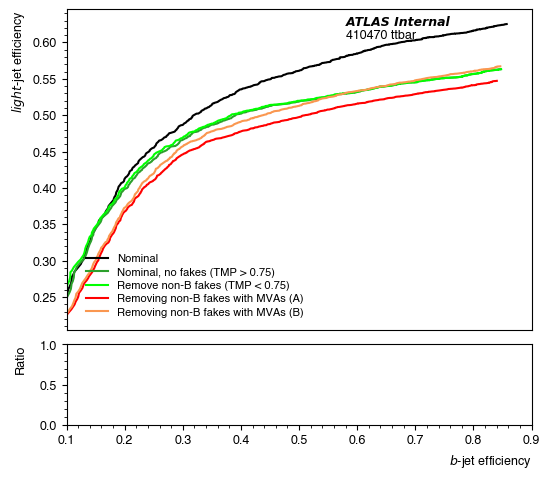

In [143]:
plotLLRrocs(effValues, version_new, tracksRF, 'b', 'l', 0.1, 0.9, outDir, rej=False)

In [56]:
def pTROCs(pTDict, version, tracks, dictName, outDir, xTLong=0.6, xTShort=0.7):
    for j in ['l', 'c']:
        for name, text in pTDict.items():
            print (name)
            version_new = version + '_' + name
            LLRs = getEffvalues(inDir, version_new, tracks, dictName)
            if 'e' not in name:
                plotLLRrocs(LLRs, version_new, tracks, 'b', j, 0.1, 0.9, outDir, xTLong, text)
            else:
                plotLLRrocs(LLRs, version_new, tracks, 'b', j, 0.1, 0.9, outDir, xTShort, text)


In [79]:
pTROCs(pTDictRF, ttbar, tracksRF, dictName, outDir)

le_250
nom


KeyboardInterrupt: 